# 資料預處理

In [1]:
from keras.utils import np_utils # One-hot-encoding
import numpy as np
np.random.seed(10) # 設定seed，可以讓每次隨機產生的資料，有相同輸出

In [2]:
from keras.datasets import mnist
(x_train_image,y_train_label),\
(x_test_image,y_test_label)= mnist.load_data()

In [3]:
x_Train =x_train_image.reshape(60000, 784).astype('float32') #2維圖片轉一維；資料類型轉 float
x_Test = x_test_image.reshape(10000, 784).astype('float32')

In [4]:
x_Train_normalize = x_Train / 255
x_Test_normalize = x_Test / 255

In [5]:
y_Train_OneHot = np_utils.to_categorical(y_train_label) # 對 y 做 One-hot-encoding
y_Test_OneHot = np_utils.to_categorical(y_test_label)

# 建立模型

In [6]:
from keras.models import Sequential
from keras.layers import Dense

In [9]:
model = Sequential() # 建立線性堆疊模型，後續只要用model.add方法，加入Dense神經網路層( Dense層 是 Fully Connected的神經網路層)

In [8]:
#將「輸入層」與「隱藏層」加入模型

In [10]:
model.add(Dense(units=1000,     # 此隱藏層神經元 1000個
                input_dim=784,  # input = 784維 (前面 28*28 轉好的)
                kernel_initializer='normal',  # 用 normal distribution 亂數 得到初始的 weight & bias
                activation='relu'))

In [11]:
#將「輸出層」加入模型

In [12]:
model.add(Dense(units=10,        # 最後一個隱藏層是輸出層，神經元10個對應數字 1~10，不須設定 input_dim= ，它會自動抓到上層的1000個神經元
                kernel_initializer='normal', 
                activation='softmax'))

In [13]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1000)              785000    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                10010     
Total params: 795,010
Trainable params: 795,010
Non-trainable params: 0
_________________________________________________________________
None


# 訓練模型

In [15]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy']) # 最優化方法用 Adam、評估模型用 'accuracy'

In [16]:
train_history=model.fit(x=x_Train_normalize, y=y_Train_OneHot,
                        validation_split=0.2,   # 從 train 切出 20% 做validation，留下80% 做train
                        epochs=10, batch_size=200, # 一次訓練 200筆資料
                        verbose=2)  # 顯示訓練過程

Epoch 1/10
240/240 - 2s - loss: 0.2948 - accuracy: 0.9147 - val_loss: 0.1512 - val_accuracy: 0.9575
Epoch 2/10
240/240 - 1s - loss: 0.1156 - accuracy: 0.9666 - val_loss: 0.1071 - val_accuracy: 0.9675
Epoch 3/10
240/240 - 1s - loss: 0.0744 - accuracy: 0.9792 - val_loss: 0.0944 - val_accuracy: 0.9727
Epoch 4/10
240/240 - 1s - loss: 0.0508 - accuracy: 0.9855 - val_loss: 0.0826 - val_accuracy: 0.9756
Epoch 5/10
240/240 - 1s - loss: 0.0361 - accuracy: 0.9903 - val_loss: 0.0735 - val_accuracy: 0.9774
Epoch 6/10
240/240 - 1s - loss: 0.0255 - accuracy: 0.9937 - val_loss: 0.0754 - val_accuracy: 0.9777
Epoch 7/10
240/240 - 1s - loss: 0.0183 - accuracy: 0.9959 - val_loss: 0.0742 - val_accuracy: 0.9784
Epoch 8/10
240/240 - 1s - loss: 0.0126 - accuracy: 0.9975 - val_loss: 0.0721 - val_accuracy: 0.9800
Epoch 9/10
240/240 - 1s - loss: 0.0083 - accuracy: 0.9987 - val_loss: 0.0730 - val_accuracy: 0.9797
Epoch 10/10
240/240 - 1s - loss: 0.0067 - accuracy: 0.9992 - val_loss: 0.0714 - val_accuracy: 0.9808

# 以圖形顯示訓練過程

In [18]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

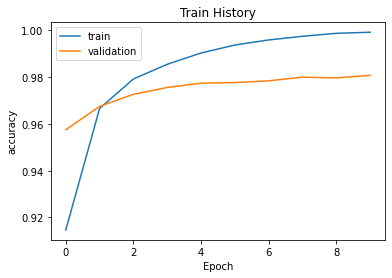

In [22]:
show_train_history(train_history,'accuracy','val_accuracy')

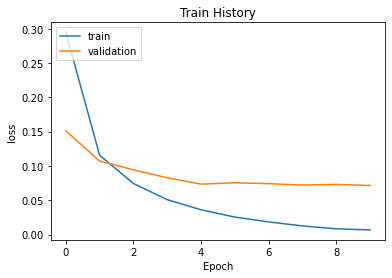

In [23]:
show_train_history(train_history,'loss','val_loss')

# 評估模型準確率

In [24]:
scores = model.evaluate(x_Test_normalize, y_Test_OneHot)
print()
print('accuracy=',scores[1])

313/313 [==============================] - 0s 914us/step - loss: 0.0615 - accuracy: 0.9814

accuracy= 0.9814000129699707


# 進行預測

In [25]:
prediction=model.predict_classes(x_Test)

C:\Users\User\.conda\envs\yvonne\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [26]:
prediction

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [27]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images,labels,prediction,
                                  idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[idx], cmap='binary')

        ax.set_title("label=" +str(labels[idx])+
                     ",predict="+str(prediction[idx])
                     ,fontsize=10) 
        
        ax.set_xticks([]);ax.set_yticks([])        
        idx+=1 
    plt.show()

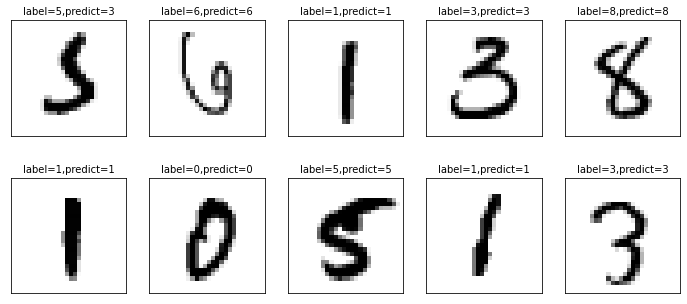

In [28]:
plot_images_labels_prediction(x_test_image,y_test_label,
                              prediction,idx=340)

# confusion matrix

In [29]:
import pandas as pd
pd.crosstab(y_test_label,prediction,
            rownames=['label'],colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,971,1,0,1,1,0,3,1,2,0
1,0,1121,4,1,0,1,2,2,4,0
2,2,0,1012,4,1,0,2,6,5,0
3,0,0,1,990,0,8,0,3,3,5
4,2,0,1,1,959,0,2,2,1,14
5,2,0,0,4,1,875,3,1,4,2
6,4,2,1,1,4,4,942,0,0,0
7,1,3,7,1,0,0,0,1009,2,5
8,3,0,3,5,1,1,1,3,953,4


In [24]:
df = pd.DataFrame({'label':y_test_label, 'predict':prediction})
df[:2]

,label,predict
0,7,7
1,2,2


In [25]:
df[(df.label==5)&(df.predict==3)]

,label,predict
340,5,3
1003,5,3
1082,5,3
1393,5,3
1670,5,3
2035,5,3
2162,5,3
2526,5,3
2597,5,3
2810,5,3


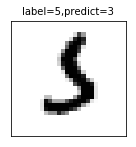

In [26]:
plot_images_labels_prediction(x_test_image,y_test_label
                              ,prediction,idx=340,num=1)

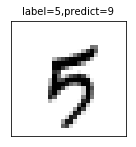

In [27]:
plot_images_labels_prediction(x_test_image,y_test_label
                              ,prediction,idx=1289,num=1)